# Análise de Tabelas da ALESP

Esse notebook contém um estudo exploratório da base de dados da ALESP que está disponível publicamente [neste link](https://www.al.sp.gov.br/dados-abertos/).

## Instalando bibliotecas

In [1]:
# instalando pandera
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 122 kB 2.4 MB/s 


## Importando bibliotecas

In [2]:
# importando bibliotecas
import pandas as pd
import pandera as pa
import numpy as np

In [3]:
pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100000000)

## Extraindo a base de dados

In [4]:
# df original direto do servidor da alesp
#df = pd.read_xml('http://www.al.sp.gov.br/repositorioDados/deputados/despesas_gabinetes.xml')

In [5]:
# extraindo base de dados original transformada em csv (completa)
df = pd.read_csv('https://storage.googleapis.com/aulas-bc26-dados-gbs/alesp/alesp_desp.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
# extraindo base de dados (incompletos)
# df_desp = pd.read_csv('https://storage.googleapis.com/aulas-bc26-dados-gbs/alesp/despesa_alesp.csv')
df_cad = pd.read_csv('https://storage.googleapis.com/aulas-bc26-dados-gbs/alesp/cadastro_alesp.csv')

In [7]:
# vendo se está tudo certo com a base de dados
df.head(3)

,Unnamed: 0,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,0,2015,300257,3,200.0,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,1,2015,300257,3,295.4,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2,2015,300257,3,2850.0,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU


In [8]:
df_cad.head(3)

,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,PlacaVeiculo
0,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,300605,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,NaN,NaN
1,548,1000000332,20370,EXE,Térreo,09/07,"<p class=""MsoNormal"">Com uma hist&oacute;ria d...",adrianaborgo@al.sp.gov.br,300606,Adriana Borgo,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 45,AGIR,(11) 3886-6567/8770,NaN,NaN
2,547,1000000335,20455,EXE,2º andar,26/08,<p>Danilo Mascarenhas de Balas nasceu na cidad...,apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11)3886-6052/6054,NaN,NaN


### Back-up

In [9]:
# backup do dataframe alesp_desp
dfback = df.copy()
# backup do dataframe cadastro_alesp
dfback_cad = df_cad.copy()

In [10]:
dfback.dtypes

Unnamed: 0      int64
Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [11]:
dfback_cad.dtypes

IdDeputado          int64
IdSPL               int64
IdUA                int64
Situacao           object
Andar              object
Aniversario        object
Biografia          object
Email              object
Matricula           int64
NomeParlamentar    object
PathFoto           object
Sala               object
Partido            object
Telefone           object
Fax                object
PlacaVeiculo       object
dtype: object

## Iniciando pré-análise

### desp_alesp

In [12]:
df.shape

(536568, 9)

In [13]:
# vendo se tipos de dados batem com os tipos das colunas
df.info()
# aqui vemos que podemos mudar tipo de dados do ano, mes, cnpj
# vemos também que faltam dados na coluna cnpj
# vamos juntar as colunas ano e mes e transformá-la em datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536568 entries, 0 to 536567
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  536568 non-null  int64  
 1   Ano         536568 non-null  int64  
 2   Matricula   536568 non-null  int64  
 3   Mes         536568 non-null  int64  
 4   Valor       536568 non-null  float64
 5   CNPJ        525676 non-null  object 
 6   Deputado    536568 non-null  object 
 7   Tipo        536568 non-null  object 
 8   Fornecedor  536568 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 36.8+ MB


In [14]:
# consulta valores ausentes
df.isna().sum()
# inconsistencias encontradas: CNPJS zerados

Unnamed: 0        0
Ano               0
Matricula         0
Mes               0
Valor             0
CNPJ          10892
Deputado          0
Tipo              0
Fornecedor        0
dtype: int64

In [15]:
dft = pd.DataFrame(df.CNPJ.unique(), columns=["CNPJ"])

In [16]:
# conferindo se há valores não numericos em CNPJ
valores_estranhos = []
for i in range(len(dft)):
  try:
    int(dft.loc[i, "CNPJ"])
  except Exception:
    valores_estranhos.append(dft.loc[i, "CNPJ"])
print("Para corrigir: ")
print(valores_estranhos)

Para corrigir: 
[nan, 'O4689799000126', 'O4040553000129', 'O2358317000120', 'O1520430000105', '00O21449000136', 'O7482309000104']


In [17]:
# localizando valores estranhos no df
ftcnpj = df.CNPJ.isin(['O4689799000126', 'O4040553000129', 'O2358317000120', 'O1520430000105', '00O21449000136', 'O7482309000104'])
df.loc[ftcnpj]
# análise: a maioria desses registros foram feitos pelos mesmos deputados, em categorias também repetidas

,Unnamed: 0,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
55891,55891,2007,300482,11,76.78,O4689799000126,ANTÔNIO CARLOS,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",VIA BARBARESCO LTDA
55964,55964,2008,300482,2,70.02,O4040553000129,ANTÔNIO CARLOS,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO AUSTRIA LTDA
55998,55998,2008,300482,3,50.00,O4040553000129,ANTÔNIO CARLOS,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO AUSTRIA LTDA
316251,316251,2007,300455,9,40.00,O2358317000120,MARCOS MARTINS,"G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, IN...",BASENET INFORMATICA LTDA
365639,365639,2007,300468,12,504.12,O1520430000105,OLÍMPIO GOMES,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",PICANHARIA DO GAUCHO/ JOCELI NARDI CHURRASCARI...
389510,389510,2002,300379,5,786.55,00O21449000136,PEDRO YVES,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO BOSQUE SATÉLITE LTDA
389553,389553,2002,300379,9,915.76,00O21449000136,PEDRO YVES,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO BOSQUE SATÉLITE LTDA
389565,389565,2002,300379,10,802.69,00O21449000136,PEDRO YVES,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO BOSQUE SATÉLITE LTDA
389578,389578,2002,300379,12,3101.63,00O21449000136,PEDRO YVES,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO BOSQUE SATÉLITE LTDA
389582,389582,2003,300379,1,5472.30,00O21449000136,PEDRO YVES,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO BOSQUE SATÉLITE LTDA


In [18]:
# analisando valor mínimo gasto
df.Valor.min()

0.0

In [19]:
# analisando valor máximo gasto
df.Valor.max()

18040.78

In [20]:
# analisando quantidade de entradas de valor
df.Valor.count()

536568

### cadastro_alesp

In [21]:
df_cad.shape

(93, 16)

In [22]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   IdDeputado       93 non-null     int64 
 1   IdSPL            93 non-null     int64 
 2   IdUA             93 non-null     int64 
 3   Situacao         93 non-null     object
 4   Andar            92 non-null     object
 5   Aniversario      93 non-null     object
 6   Biografia        93 non-null     object
 7   Email            93 non-null     object
 8   Matricula        93 non-null     int64 
 9   NomeParlamentar  93 non-null     object
 10  PathFoto         93 non-null     object
 11  Sala             93 non-null     object
 12  Partido          93 non-null     object
 13  Telefone         93 non-null     object
 14  Fax              11 non-null     object
 15  PlacaVeiculo     1 non-null      object
dtypes: int64(4), object(12)
memory usage: 11.8+ KB


In [23]:
# consulta valores ausentes
df_cad.isna().sum()
# inconsistencias encontradas: Fax e PlacaVeiculo com valores zerados, daremos drop nessas colunas

IdDeputado          0
IdSPL               0
IdUA                0
Situacao            0
Andar               1
Aniversario         0
Biografia           0
Email               0
Matricula           0
NomeParlamentar     0
PathFoto            0
Sala                0
Partido             0
Telefone            0
Fax                82
PlacaVeiculo       92
dtype: int64

## Tratamento Inicial de Dados (alesp_desp.csv)

### Arrumando CNPJS

In [24]:
# substituindo os Os por 0s
df.CNPJ.replace('O','0',regex=True,inplace=True)
# não irei converter o tipo da coluna CNPJ para número (int u float)
# pois como o cnpj é um dado que não fazemos cálculos, não há necessidade

### Renomeando Colunas

In [25]:
df.dtypes

Unnamed: 0      int64
Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [26]:
# renomeando as colunas 
df.rename(columns={
    'Ano':'ano',
    'Matricula':'matricula',
    'Mes':'mes',
    'Valor':'valor',
    'CNPJ':'cnpj',
    'Deputado':'deputado',
    'Tipo':'tipo',
    'Fornecedor':'fornecedor'
    }, inplace=True)

In [27]:
df.dtypes

Unnamed: 0      int64
ano             int64
matricula       int64
mes             int64
valor         float64
cnpj           object
deputado       object
tipo           object
fornecedor     object
dtype: object

In [28]:
# trasformando type para string
df['mes'] = df['mes'].astype(str)
df['ano'] = df['ano'].astype(str)

In [29]:
df.dtypes

Unnamed: 0      int64
ano            object
matricula       int64
mes            object
valor         float64
cnpj           object
deputado       object
tipo           object
fornecedor     object
dtype: object

In [30]:
# criando coluna concatenando mês com ano
df['data'] = df['mes'] + '/' + df['ano']

In [31]:
# trasformando type para datetime
df['data'] = pd.to_datetime(df['data'], dayfirst=True)

In [32]:
df.dtypes

Unnamed: 0             int64
ano                   object
matricula              int64
mes                   object
valor                float64
cnpj                  object
deputado              object
tipo                  object
fornecedor            object
data          datetime64[ns]
dtype: object

In [33]:
# criando novo df tirando colunas de ano e mes
df = df[['matricula', 'deputado', 'data', 'tipo', 'valor', 'cnpj', 'fornecedor']]

In [34]:
df

,matricula,deputado,data,tipo,valor,cnpj,fornecedor
0,300257,ABELARDO CAMARINHA,2015-03-01,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA
1,300257,ABELARDO CAMARINHA,2015-03-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740000125,PAPER FACE COMERCIAL LTDA
2,300257,ABELARDO CAMARINHA,2015-03-01,N - MORADIA,2850.00,22145388877,LARA SERVINO VARGAS ABREU
3,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883000113,CENTRO AUTOMOTIVO TOP 23 LTDA
4,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...
536563,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",120.00,6306675000140.0,OPTEI EXPRESS LTDA.
536564,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",2096.80,52204617000122.0,CHURRASCARIA JANDA LTDA.
536565,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",13.48,62925474000282.0,ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
536566,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",38.08,66747577000170.0,IBIZA EUROPEIA ALIMENTOS LTDA


### Procurando Mais Inconsistências

In [82]:
# verificando valores zerados
ftvalor = df.valor == 0
df.loc[ftvalor]
# os dados existem, então deixamos como está

,matricula,deputado,data,tipo,valor,cnpj,fornecedor
2491,300432,ADILSON ROSSI,2012-05-01,"D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS ...",0.0,04912075000108,BRASILGRAFIA ABC GRAFICA EE EDITORA LTDA EPP
11049,300404,AFONSO LOBATO,2012-10-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,09675345691,MICHEL MURAD
13178,300607,AGENTE FEDERAL DANILO BALAS,2021-03-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,33462199000129,DNZCORP HOLDING LDA
13299,300607,AGENTE FEDERAL DANILO BALAS,2021-06-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,33462199000129,DNZCORP HOLDING LDA
19990,300288,ALDO DEMARCHI,2017-09-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,58054510853,JOUBER NATAL TUROLLAA
...,...,...,...,...,...,...,...
486453,300520,SEBASTIÃO SANTOS,2021-11-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,10914608843.0,ARNALDO UEHARA
486510,300520,SEBASTIÃO SANTOS,2021-12-01,"M - MANUTENÇÃO DE BENS MÓVEIS, IMÓVEIS, CONDO...",0.0,10914608843.0,ARNALDO UEHARA
514195,300428,VICENTE CÂNDIDO,2007-06-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,0.0,58528761000109.0,SERVTÉCNICA AUTOMAÇÃO LTDA.
525242,300426,WALDIR AGNELLO,2009-04-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,0.0,2019936000190.0,PLUS CENTER AUTO POSTO LTDA


In [35]:
filtronulo1 = df.cnpj.isna()
df.loc[filtronulo1]

,matricula,deputado,data,tipo,valor,cnpj,fornecedor
787,300439,ADILSON BARROSO,2003-03-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,192.6,NaN,PEDÁGIO
814,300439,ADILSON BARROSO,2003-04-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,104.8,NaN,PEDÁGIO
852,300439,ADILSON BARROSO,2003-05-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,154.8,NaN,PEDÁGIO
877,300439,ADILSON BARROSO,2003-05-01,K - LOCAÇÃO DE BENS MÓVEIS,40.0,NaN,TAXI
892,300439,ADILSON BARROSO,2003-06-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,12.2,NaN,PEDÁGIO
...,...,...,...,...,...,...,...
536396,300441,ÍTALO CARDOSO,2006-10-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,80.6,NaN,PEDÁGIO
536435,300441,ÍTALO CARDOSO,2006-11-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,19.7,NaN,PEDÁGIO
536472,300441,ÍTALO CARDOSO,2006-12-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,63.2,NaN,PEDÁGIO
536499,300441,ÍTALO CARDOSO,2007-01-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,14.6,NaN,PEDÁGIO


In [36]:
cnpjnulos = df.loc[filtronulo1]

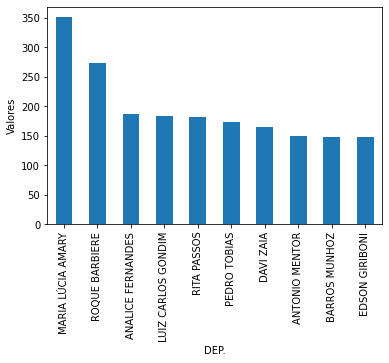

In [37]:
# analisando quem são as pessoas que mais fizeram registros com CNPJ nulo
cnpjnulos.groupby(['deputado']).size().sort_values(ascending=False).head(10).plot.bar(xlabel='DEP.',ylabel='Valores',rot=90)

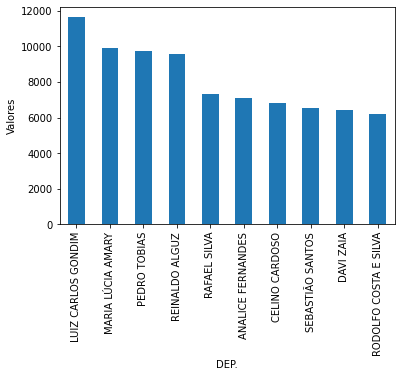

In [38]:
# analisando quem são as pessoas que mais fizeram registros no geral
df.groupby(['deputado']).size().sort_values(ascending=False).head(10).plot.bar(xlabel='DEP.',ylabel='Valores',rot=90)

In [39]:
# procurando dados inconsistentes
sorted(pd.unique(df['fornecedor']))
# inconsistencias encontradas: nomes diferentes para um mesmo tipo de serviço/fornecedor

['" A COMADRE LANCHONETE E RESTAURANTE" PEDRO VILLELA  VILHENA - ME.',
 '" VÓ MAPHALDA "  SALADA GRILL',
 '"A TRIBUNA" DE SANTOS JORNAL E EDITORA LTDA',
 '"A VARANDA" - JOSÉ ROBERTO GERALDO - ME',
 '"ESTÂNCIA SERVIÇOS ALIMENTARES" - IVONE MEIRA DA SILVA - ME',
 '"MEGA PARK " ESTACIONAMENTO',
 '"O BRASEIRO" GALETO NA BRASA LTDA',
 '"O BRAZEIRO" GALETO NA BRASA LTDA',
 '"O REI DOS ENVELOPES" GRAF. COMERCIAL E DISTRIBUIDORA LTDA.',
 '"POSTO SÃO SEBASTIÃO" - AUTO POSTO CESTO GARCIA LTDA',
 "'FATOR GRAFICO GRAFICA E EDITORA LTDA -ME",
 "'FREIRE VEÍCULOS",
 '(POSTO MENEGUETTI) AUTO POSTO JOTAVE LTDA',
 ',ARIA HELENA GOMES RESTAURANTE ME',
 ',ARIA JULIA BARNABE BARBOZA - ME',
 ',AUTO POSTO CENTER LESTE LTDA',
 ',AUTO POSTO ITAPURA',
 ',FENIX AUTO POSTO DE SERVIÇOS LTDA',
 ',ODELO PAPELARIA E LIVRARIA LTDA',
 ',POSTO DE SERVIÇOS MARIANA LTDA',
 ",POSTO DE SERVIÇOS PAP'S ENSEADA LTDA",
 ',RONER PIRES NUNES - ME',
 '-AUTO POSTO MOEMA DA FRONTEIRA LTDA',
 '.K.F. COMÉRCIO DE ALIMENTOS LTDA',
 ".MC

## Tratamento Inicial de Dados (cadastro_alesp.csv)

### Limpeza dos Dados

In [40]:
# drop colunas que não serão utilizadas da df
df_cad.drop(['Fax', 'PlacaVeiculo', 'Biografia', 'Email', 'PathFoto', 'Telefone', 'Situacao'], axis=1, inplace=True)

### Renomeando Colunas

In [41]:
df_cad.dtypes

IdDeputado          int64
IdSPL               int64
IdUA                int64
Andar              object
Aniversario        object
Matricula           int64
NomeParlamentar    object
Sala               object
Partido            object
dtype: object

In [42]:
# renomeando as colunas 
df_cad.rename(columns={
    'IdDeputado':'id_deputado',
    'IdSPL':'id_spl',
    'IdUA':'id_ua',
    'Andar':'andar',
    'Aniversario':'aniversario',
    'Matricula':'matricula',
    'NomeParlamentar':'nome_parlamentar',
    'Sala':'sala',
    'Partido':'partido'
    }, inplace=True)

In [43]:
df_cad.head(1)

,id_deputado,id_spl,id_ua,andar,aniversario,matricula,nome_parlamentar,sala,partido
0,549,1000000330,20377,3º andar,01/11,300605,Adalberto Freitas,305,PSDB


### Procurando Mais Inconsistências

In [44]:
# dados ok
sorted(pd.unique(df_cad['id_deputado'])) 

[6,
 11,
 13,
 28,
 38,
 49,
 58,
 70,
 71,
 74,
 78,
 84,
 87,
 90,
 91,
 95,
 110,
 112,
 126,
 128,
 141,
 142,
 148,
 158,
 163,
 173,
 175,
 177,
 180,
 261,
 263,
 267,
 270,
 274,
 276,
 279,
 281,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 545,
 546,
 547,
 548,
 549,
 561,
 1521,
 1541,
 1561]

In [45]:
# inconsistência: valor zerado
sorted(pd.unique(df_cad['id_spl'])) 

[0,
 39,
 40,
 58,
 64,
 68,
 70,
 78,
 82,
 94,
 180,
 197,
 232,
 268,
 291,
 431,
 434,
 448,
 454,
 4926,
 10592,
 10597,
 10603,
 10611,
 10613,
 10619,
 12380,
 12381,
 12392,
 12396,
 12414,
 12419,
 12420,
 13076,
 13077,
 13080,
 13082,
 13085,
 13086,
 13089,
 13091,
 13093,
 13094,
 13095,
 13096,
 13097,
 13098,
 13109,
 1000000330,
 1000000332,
 1000000334,
 1000000335,
 1000000337,
 1000000338,
 1000000339,
 1000000340,
 1000000342,
 1000000346,
 1000000347,
 1000000348,
 1000000349,
 1000000350,
 1000000351,
 1000000352,
 1000000354,
 1000000355,
 1000000358,
 1000000360,
 1000000362,
 1000000363,
 1000000365,
 1000000366,
 1000000367,
 1000000369,
 1000000370,
 1000000372,
 1000000373,
 1000000374,
 1000000376,
 1000000378,
 1000000397,
 1000000399,
 1000000400,
 1000000401,
 1000000406,
 1000000408,
 1000000410,
 1000000413,
 1000000419,
 1000000420,
 1000000426,
 1000000610,
 1000000723]

In [46]:
# verificando id zerada
ftidspl = df_cad.id_spl == 0
df_cad.loc[ftidspl]
# os dados existem, então deixamos como está

,id_deputado,id_spl,id_ua,andar,aniversario,matricula,nome_parlamentar,sala,partido
65,1541,0,20398,Térreo,28/01,300654,Murilo Felix,T. 48,PODE


In [47]:
# dados ok
sorted(pd.unique(df_cad['id_ua'])) 

[20365,
 20366,
 20368,
 20369,
 20370,
 20371,
 20372,
 20373,
 20374,
 20375,
 20376,
 20377,
 20378,
 20379,
 20380,
 20381,
 20382,
 20383,
 20384,
 20385,
 20386,
 20387,
 20388,
 20389,
 20390,
 20391,
 20392,
 20393,
 20394,
 20395,
 20396,
 20397,
 20398,
 20399,
 20400,
 20401,
 20402,
 20403,
 20404,
 20405,
 20406,
 20407,
 20408,
 20409,
 20410,
 20411,
 20412,
 20413,
 20414,
 20415,
 20416,
 20417,
 20418,
 20419,
 20420,
 20421,
 20422,
 20423,
 20424,
 20425,
 20426,
 20427,
 20428,
 20429,
 20430,
 20431,
 20432,
 20433,
 20434,
 20435,
 20436,
 20437,
 20438,
 20439,
 20440,
 20441,
 20442,
 20443,
 20444,
 20445,
 20446,
 20447,
 20448,
 20449,
 20450,
 20451,
 20452,
 20453,
 20454,
 20455,
 20456,
 20457,
 20458]

In [48]:
# inconsistência: valor NaN e valores iguais escritos diferentes
pd.unique(df_cad['andar'])

array(['3º andar', 'Térreo', '2º andar', '3º', '1º', '4º', '2º',
       '1º Andar', '3º Andar', 'Téreo', nan, '2°', '4º Andar', '1º andar'],
      dtype=object)

In [49]:
# compatibilizando valores
df_cad.andar.replace(['4º', '4º Andar'],'4º andar',inplace=True) 
df_cad.andar.replace(['3º', '3º Andar'],'3º andar',inplace=True) 
df_cad.andar.replace(['2°', '2º'],'2º andar',inplace=True) 
df_cad.andar.replace(['1º', '1º Andar'],'1º andar',inplace=True) 
df_cad.andar.replace(['Térreo', 'Téreo'],'térreo',inplace=True) 

In [50]:
pd.unique(df_cad['andar'])

array(['3º andar', 'térreo', '2º andar', '1º andar', '4º andar', nan],
      dtype=object)

In [51]:
# inconsistência: aniversário 'null/null'
sorted(pd.unique(df_cad['aniversario'])) 

['01/02',
 '01/04',
 '01/05',
 '01/08',
 '01/10',
 '01/11',
 '02/07',
 '02/10',
 '02/11',
 '03/08',
 '03/09',
 '04/01',
 '05/03',
 '05/09',
 '06/01',
 '06/04',
 '06/08',
 '06/10',
 '06/11',
 '07/01',
 '07/05',
 '07/06',
 '07/09',
 '08/01',
 '08/07',
 '08/10',
 '08/12',
 '09/02',
 '09/04',
 '09/07',
 '09/08',
 '10/09',
 '10/10',
 '10/11',
 '11/09',
 '12/09',
 '13/06',
 '13/07',
 '14/02',
 '14/05',
 '14/07',
 '15/05',
 '15/08',
 '15/09',
 '15/12',
 '16/01',
 '16/03',
 '16/05',
 '16/06',
 '16/08',
 '16/09',
 '17/03',
 '17/06',
 '17/09',
 '18/01',
 '18/06',
 '19/01',
 '19/06',
 '20/05',
 '20/11',
 '21/04',
 '21/12',
 '22/01',
 '22/05',
 '22/12',
 '23/04',
 '24/04',
 '25/01',
 '25/06',
 '25/08',
 '25/09',
 '26/05',
 '26/08',
 '26/10',
 '28/01',
 '28/03',
 '28/07',
 '28/10',
 '29/01',
 '29/03',
 '29/07',
 '29/12',
 '30/10',
 '31/10',
 'null/null']

In [52]:
# transformando valor null/null para NaN
df_cad.replace('null/null', np.NaN, inplace=True)

In [53]:
pd.unique(df_cad['aniversario'])

array(['01/11', '09/07', '26/08', '04/01', '17/09', '02/07', '25/09',
       '09/04', '07/06', '19/06', '26/10', '15/09', '01/08', '31/10',
       '08/10', '13/07', '15/12', '10/11', '14/05', '07/01', '10/10',
       '14/02', '19/01', '08/07', '25/08', '11/09', '13/06', nan, '16/06',
       '21/04', '06/08', '01/04', '06/04', '22/05', '20/05', '20/11',
       '15/08', '26/05', '02/11', '16/03', '29/01', '28/03', '21/12',
       '25/06', '16/01', '07/09', '22/12', '12/09', '16/05', '10/09',
       '29/12', '06/10', '17/06', '07/05', '18/01', '30/10', '15/05',
       '08/12', '03/08', '28/01', '09/02', '02/10', '24/04', '25/01',
       '14/07', '01/05', '28/07', '05/09', '06/01', '05/03', '09/08',
       '29/07', '17/03', '03/09', '29/03', '16/08', '28/10', '01/10',
       '18/06', '08/01', '01/02', '23/04', '16/09', '06/11', '22/01'],
      dtype=object)

In [54]:
# dados ok
sorted(pd.unique(df_cad['matricula'])) 

[300098,
 300188,
 300205,
 300217,
 300260,
 300264,
 300267,
 300288,
 300292,
 300303,
 300318,
 300344,
 300367,
 300382,
 300395,
 300407,
 300430,
 300431,
 300440,
 300449,
 300450,
 300470,
 300471,
 300483,
 300485,
 300497,
 300499,
 300501,
 300510,
 300513,
 300519,
 300520,
 300533,
 300534,
 300536,
 300539,
 300540,
 300543,
 300544,
 300545,
 300548,
 300549,
 300552,
 300553,
 300583,
 300584,
 300589,
 300605,
 300606,
 300607,
 300608,
 300609,
 300612,
 300613,
 300614,
 300615,
 300616,
 300617,
 300618,
 300619,
 300620,
 300621,
 300622,
 300623,
 300624,
 300625,
 300626,
 300627,
 300628,
 300629,
 300630,
 300631,
 300633,
 300634,
 300635,
 300636,
 300637,
 300638,
 300639,
 300640,
 300641,
 300642,
 300643,
 300644,
 300645,
 300646,
 300647,
 300648,
 300649,
 300650,
 300653,
 300654,
 300655]

In [55]:
# dados ok
sorted(pd.unique(df_cad['nome_parlamentar'])) 

['Adalberto Freitas',
 'Adriana Borgo',
 'Agente Federal Danilo Balas',
 'Aldo Demarchi',
 'Alex de Madureira',
 'Alexandre Pereira',
 'Altair Moraes',
 'Analice Fernandes',
 'André do Prado',
 'Ataide Teruel',
 'Barros Munhoz',
 'Bruno Ganem',
 'Caio França',
 'Campos Machado',
 'Carla Morando',
 'Carlos Cezar',
 'Carlos Giannazi',
 'Carlão Pignatari',
 'Castello Branco',
 'Cezar',
 'Conte Lopes',
 'Coronel Nishikawa',
 'Coronel Telhada',
 'Daniel José',
 'Daniel Soares',
 'Delegada Graciela',
 'Delegado Bruno Lima',
 'Delegado Olim',
 'Dirceu Dalben',
 'Douglas Garcia',
 'Dr. Jorge do Carmo',
 'Dra. Damaris Moura',
 'Edmir Chedid',
 'Edna Macedo',
 'Edson Giriboni',
 'Emidio de Souza',
 'Enio Tatto',
 'Erica Malunguinho',
 'Estevam Galvão',
 'Fernando Cury',
 "Frederico d'Avila",
 'Gil Diniz',
 'Gilmaci Santos',
 'Heni Ozi Cukier',
 'Isa Penna',
 'Itamar Borges',
 'Janaina Paschoal',
 'Jorge Caruso',
 'Jorge Wilson Xerife do Consumidor',
 'José Américo',
 'Leci Brandão',
 'Leticia Ag

In [56]:
# inconsistências: valores com T, espaços, traços e pontos
sorted(pd.unique(df_cad['sala'])) 

['103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '110',
 '111',
 '112',
 '148',
 '156',
 '157',
 '158',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '173',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '238',
 '247',
 '251',
 '252',
 '253',
 '254',
 '255',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '3033',
 '304',
 '305',
 '306',
 '307',
 '308',
 '313',
 '346',
 '347',
 '350',
 '351',
 '352',
 '353',
 '354',
 '355',
 '356',
 '357',
 '358',
 '359',
 '360',
 '361',
 '401',
 '405',
 '410',
 'T 05',
 'T 44',
 'T-03',
 'T-39',
 'T-47',
 'T-50',
 'T. 04',
 'T. 06',
 'T. 40',
 'T. 45',
 'T. 46',
 'T. 48',
 'T. 53',
 'T. 55',
 'T.02',
 'T.08',
 'T.10',
 'T.12',
 'T.41',
 'T.49',
 'T.52',
 'T54']

In [57]:
# arrumando salas com T
df_cad.replace('T 05','T-05', inplace=True)
df_cad.replace('T 44','T-44', inplace=True)
df_cad.replace('T. 04','T-04', inplace=True)
df_cad.replace('T. 06','T-06', inplace=True)
df_cad.replace('T. 40','T-40', inplace=True)
df_cad.replace('T. 45','T-45', inplace=True)
df_cad.replace('T. 46','T-46', inplace=True)
df_cad.replace('T. 48','T-48', inplace=True)
df_cad.replace('T. 53','T-53', inplace=True)
df_cad.replace('T. 55','T-55', inplace=True)
df_cad.replace('T.02','T-02', inplace=True)
df_cad.replace('T.08','T-08', inplace=True)
df_cad.replace('T.10','T-10', inplace=True)
df_cad.replace('T.41','T-41', inplace=True)
df_cad.replace('T.12','T-12', inplace=True)
df_cad.replace('T.49','T-49', inplace=True)
df_cad.replace('T.52','T-52', inplace=True)
df_cad.replace('T54','T-54', inplace=True)

In [58]:
sorted(pd.unique(df_cad['sala'])) 

['103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '110',
 '111',
 '112',
 '148',
 '156',
 '157',
 '158',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '173',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '238',
 '247',
 '251',
 '252',
 '253',
 '254',
 '255',
 '256',
 '257',
 '258',
 '259',
 '260',
 '261',
 '3033',
 '304',
 '305',
 '306',
 '307',
 '308',
 '313',
 '346',
 '347',
 '350',
 '351',
 '352',
 '353',
 '354',
 '355',
 '356',
 '357',
 '358',
 '359',
 '360',
 '361',
 '401',
 '405',
 '410',
 'T-02',
 'T-03',
 'T-04',
 'T-05',
 'T-06',
 'T-08',
 'T-10',
 'T-12',
 'T-39',
 'T-40',
 'T-41',
 'T-44',
 'T-45',
 'T-46',
 'T-47',
 'T-48',
 'T-49',
 'T-50',
 'T-52',
 'T-53',
 'T-54',
 'T-55']

In [59]:
# dados ok
sorted(pd.unique(df_cad['partido'])) 

['AGIR',
 'AVANTE',
 'CIDADANIA',
 'MDB',
 'NOVO',
 'PATRI',
 'PC do B',
 'PDT',
 'PL',
 'PODE',
 'PP',
 'PRTB',
 'PSB',
 'PSD',
 'PSDB',
 'PSOL',
 'PT',
 'REDE',
 'REPUBLICANOS',
 'SD',
 'UNIÃO']

## Validando os Dados de Cada DF

### alesp_desp

In [60]:
df.dtypes

matricula              int64
deputado              object
data          datetime64[ns]
tipo                  object
valor                float64
cnpj                  object
fornecedor            object
dtype: object

In [66]:
# criação do schema de validação dos dados
schema1 = pa.DataFrameSchema(
    columns = {
      'matricula':pa.Column(pa.Int),
      'deputado':pa.Column(pa.String),
      'data':pa.Column(pa.DateTime),
      'tipo':pa.Column(pa.String),
      'valor':pa.Column(pa.Float),
      'cnpj':pa.Column(pa.String,nullable=True),
      'fornecedor':pa.Column(pa.String)
    }
)

In [67]:
# validador do DF
schema1.validate(df)

,matricula,deputado,data,tipo,valor,cnpj,fornecedor
0,300257,ABELARDO CAMARINHA,2015-03-01,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA
1,300257,ABELARDO CAMARINHA,2015-03-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740000125,PAPER FACE COMERCIAL LTDA
2,300257,ABELARDO CAMARINHA,2015-03-01,N - MORADIA,2850.00,22145388877,LARA SERVINO VARGAS ABREU
3,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883000113,CENTRO AUTOMOTIVO TOP 23 LTDA
4,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...
536563,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",120.00,6306675000140.0,OPTEI EXPRESS LTDA.
536564,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",2096.80,52204617000122.0,CHURRASCARIA JANDA LTDA.
536565,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",13.48,62925474000282.0,ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
536566,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",38.08,66747577000170.0,IBIZA EUROPEIA ALIMENTOS LTDA


In [63]:
df.loc[[787,814,536499,536553]] 

,matricula,deputado,data,tipo,valor,cnpj,fornecedor
787,300439,ADILSON BARROSO,2003-03-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,192.6,NaN,PEDÁGIO
814,300439,ADILSON BARROSO,2003-04-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,104.8,NaN,PEDÁGIO
536499,300441,ÍTALO CARDOSO,2007-01-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,14.6,NaN,PEDÁGIO
536553,300441,ÍTALO CARDOSO,2007-03-01,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,12.7,NaN,PEDÁGIO


In [68]:
#contagem de valores "válidos"
df.count()

matricula     536568
deputado      536568
data          536568
tipo          536568
valor         536568
cnpj          525676
fornecedor    536568
dtype: int64

### cadastro_alesp

In [69]:
df_cad.dtypes

id_deputado          int64
id_spl               int64
id_ua                int64
andar               object
aniversario         object
matricula            int64
nome_parlamentar    object
sala                object
partido             object
dtype: object

In [70]:
# criação do schema de validação dos dados
schema2 = pa.DataFrameSchema(
    columns = {
      'id_deputado':pa.Column(pa.Int),
      'id_spl':pa.Column(pa.Int),
      'id_ua':pa.Column(pa.Int),
      'andar':pa.Column(pa.String, nullable=True),
      'aniversario':pa.Column(pa.String, nullable=True),
      'matricula':pa.Column(pa.Int),
      'nome_parlamentar':pa.Column(pa.String),
      'sala':pa.Column(pa.String),
      'partido':pa.Column(pa.String)
    }
)

In [71]:
# validador do DF
schema2.validate(df_cad)

,id_deputado,id_spl,id_ua,andar,aniversario,matricula,nome_parlamentar,sala,partido
0,549,1000000330,20377,3º andar,01/11,300605,Adalberto Freitas,305,PSDB
1,548,1000000332,20370,térreo,09/07,300606,Adriana Borgo,T-45,AGIR
2,547,1000000335,20455,2º andar,26/08,300607,Agente Federal Danilo Balas,255,PL
3,128,39,20369,3º andar,04/01,300288,Aldo Demarchi,356,UNIÃO
4,546,1000000342,20399,1º andar,17/09,300608,Alex de Madureira,173,PL
...,...,...,...,...,...,...,...,...,...
88,289,13109,20414,1º andar,08/07,300584,Teonilio Barba,103,PT
89,504,1000000373,20400,3º andar,23/04,300648,Thiago Auricchio,353,PL
90,503,1000000374,20447,térreo,16/09,300649,Valeria Bolsonaro,T-06,PL
91,13,448,20394,térreo,06/11,300430,Vinícius Camarinha,T-55,PSDB


## Merge

In [72]:
# criando data frame agregado
# outer = o que encontrar de relação ele adiciona, e o que não encontrar ele repete 
# inner = usar quando você quer todas as colunas preenchidas
dft = df.merge(df_cad, how='outer')
dft.head(5)

,matricula,deputado,data,tipo,valor,cnpj,fornecedor,id_deputado,id_spl,id_ua,andar,aniversario,nome_parlamentar,sala,partido
0,300257,ABELARDO CAMARINHA,2015-03-01,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300257,ABELARDO CAMARINHA,2015-03-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740000125,PAPER FACE COMERCIAL LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,300257,ABELARDO CAMARINHA,2015-03-01,N - MORADIA,2850.00,22145388877,LARA SERVINO VARGAS ABREU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883000113,CENTRO AUTOMOTIVO TOP 23 LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análise Pós-Merge

In [75]:
# consulta valores ausentes
dft.isna().sum()
# inconsistencias encontradas: CNPJS zerados

matricula                0
deputado                 1
data                     1
tipo                     1
valor                    1
cnpj                 10893
fornecedor               1
id_deputado         364088
id_spl              364088
id_ua               364088
andar               364778
aniversario         364820
nome_parlamentar    364088
sala                364088
partido             364088
dtype: int64

In [81]:
filtronulo2 = dft.nome_parlamentar.isna()
dft.loc[filtronulo2]

,matricula,deputado,data,tipo,valor,cnpj,fornecedor,id_deputado,id_spl,id_ua,andar,aniversario,nome_parlamentar,sala,partido
0,300257,ABELARDO CAMARINHA,2015-03-01,A - COMBUSTÍVEIS E LUBRIFICANTES,200.00,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,300257,ABELARDO CAMARINHA,2015-03-01,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,295.40,68064740000125,PAPER FACE COMERCIAL LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,300257,ABELARDO CAMARINHA,2015-03-01,N - MORADIA,2850.00,22145388877,LARA SERVINO VARGAS ABREU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,100.00,10915883000113,CENTRO AUTOMOTIVO TOP 23 LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300257,ABELARDO CAMARINHA,2015-04-01,A - COMBUSTÍVEIS E LUBRIFICANTES,195.01,71806251000106,AUTO POSTO DE SERVIÇOS MARV LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536563,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",120.00,6306675000140.0,OPTEI EXPRESS LTDA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536564,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",2096.80,52204617000122.0,CHURRASCARIA JANDA LTDA.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536565,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",13.48,62925474000282.0,ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536566,300441,ÍTALO CARDOSO,2007-03-01,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",38.08,66747577000170.0,IBIZA EUROPEIA ALIMENTOS LTDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtros para Limpeza de Dados 

In [74]:
# para criar um filtro, começamos procurando uma coluna com menos tipos de dados
# para faciliar a análise
pd.unique(dft['tipo'])

array(['A - COMBUSTÍVEIS E LUBRIFICANTES',
       'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO',
       'N - MORADIA',
       'H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)',
       'J - SERVIÇOS DE COMUNICAÇÃO',
       'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS',
       'G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES',
       'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS',
       'K - LOCAÇÃO DE BENS MÓVEIS',
       'M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS',
       'F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)',
       'I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO',
       'O - LOCAÇÃO DE VEÍCULO', 'L - LOCAÇÃO DE BENS IMÓVEIS',
       'B - LOCAÇÃO E MANUT DE BENS MÓVEIS E IMÓVEIS, CONDOMÍNIOS E OUTROS',
       'P - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR', nan], dtype=object)

### Filtro A

In [ ]:
# criando um filtro para tipo A
filtroa = dft.tipo == 'A - COMBUSTÍVEIS E LUBRIFICANTES'

### Filtro C

In [ ]:
# criando um filtro para tipo C
filtroc = dft.tipo == 'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS'

In [ ]:
# cria um df filtrado com as informações da categoria C
dpedagio = dft.loc[filtroc]

In [ ]:
dpedagio

,matricula,data,valor,cnpj,tipo,fornecedor
3,300098,2013-01-01,36.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
26,300098,2013-02-01,30.0,6.116149e+13,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,A Z COMERCIO DE COMBUSTIVEIS LTDA
27,300098,2013-02-01,10.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
60,300098,2013-03-01,374.4,1.845323e+12,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,AUTOESTE VEÍCULOS E PEÇAS LTDA.
61,300098,2013-03-01,230.0,6.553230e+13,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,J. L. AUTO ELÉTRICA LTDA. - ME
...,...,...,...,...,...,...
117309,300650,2021-11-01,115.2,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117374,300650,2022-01-01,30.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117433,300650,2022-03-01,53.0,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117590,300650,2022-08-01,398.9,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO


In [ ]:
# cria um filtro para pegar partes de string que podem estar nos dados relacionados a pedagio
filtroped = dpedagio.fornecedor.str.contains('PED|PEG|SEM')

In [ ]:
# cria um novo df com base no df filtrado, passando mais um filtro de parametro
dfpedagio = dpedagio.loc[filtroped]

In [ ]:
dfpedagio

,matricula,data,valor,cnpj,tipo,fornecedor
3,300098,2013-01-01,36.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
27,300098,2013-02-01,10.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
97,300098,2013-04-01,38.6,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
128,300098,2013-05-01,5.2,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
161,300098,2013-06-01,13.7,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
...,...,...,...,...,...,...
117270,300650,2021-10-01,75.6,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117309,300650,2021-11-01,115.2,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117374,300650,2022-01-01,30.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
117433,300650,2022-03-01,53.0,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO


In [ ]:
# encontra dos nomes de fornecedor que querem dizer a mesma coisa
sorted(pd.unique(dfpedagio['fornecedor']))

['CUPONS DE PEDÁGIO',
 'PEDAGIO',
 'PEDAGIO DE ELISIARIO',
 'PEDÁGIO',
 'PEDÁGIOS',
 'PEGAGIO',
 'PRAÇA DE PEDÁGIO DE GUARUJÁ',
 'SEM PARAR',
 'SEM PARAR - CENTRO DE GESTÃO DE MEIOS DE PGTO. LTDA.',
 'SEM PARAR CENTRO DE GESTÃ&#131;O DE MEIOS DE PGTO. LTDA',
 'SEM PARAR INSTITUIÇÃO DE PAGAMENTO LTDA',
 'SEM PARAR INSTITUIÇÃO DE PAGAMENTO LTDA.']

In [ ]:
# compatibilizando dados de fornecedor para todos ficarem iguais
dft.replace(['CUPONS DE PEDÁGIO',
            'PEDAGIO',
            'PEDAGIO DE ELISIARIO',
            'PEDÁGIO',
            'PEDÁGIOS',
            'PEGAGIO',
            'PRAÇA DE PEDÁGIO DE GUARUJÁ',
            'SEM PARAR',
            'SEM PARAR - CENTRO DE GESTÃO DE MEIOS DE PGTO. LTDA.',
            'SEM PARAR CENTRO DE GESTÃ&#131;O DE MEIOS DE PGTO. LTDA',
            'SEM PARAR INSTITUIÇÃO DE PAGAMENTO LTDA',
            'SEM PARAR INSTITUIÇÃO DE PAGAMENTO LTDA.'], 
            'pedagio', inplace=True)

In [ ]:
ftpedagio = dft.fornecedor == 'pedagio'
dtfpedagio = dft.loc[ftpedagio]
dtfpedagio

,matricula,data,valor,cnpj,tipo,fornecedor
3,300098,2013-01-01,36.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
27,300098,2013-02-01,10.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
97,300098,2013-04-01,38.6,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
128,300098,2013-05-01,5.2,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
161,300098,2013-06-01,13.7,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
...,...,...,...,...,...,...
117270,300650,2021-10-01,75.6,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
117309,300650,2021-11-01,115.2,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
117374,300650,2022-01-01,30.4,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio
117433,300650,2022-03-01,53.0,NaN,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,pedagio


### Filtro D

In [ ]:
# criando um filtro para tipo D
filtrod = dft.tipo == 'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS'

### Filtro E

In [ ]:
# criando um filtro para tipo E
filtroe = dft.tipo == 'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO'

### Filtro F


In [ ]:
# criando um filtro para tipo F
filtrof = dft.tipo == 'F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)'

### Filtro G

In [ ]:
# criando um filtro para tipo G
filtrog = dft.tipo == 'G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES'

### Filtro H

In [ ]:
# criando um filtro para tipo H
filtroh = dft.tipo == 'H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)'

### Filtro I

In [ ]:
# criando um filtro para o tipo I
filtroi = dft.tipo == 'I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO'

### Filtro J

In [ ]:
# criando um filtro para tipo J
filtroj = dft.tipo == 'J - SERVIÇOS DE COMUNICAÇÃO'

### Filtro K

In [ ]:
# criando um filtro para tipo K
filtrok = dft.tipo == 'K - LOCAÇÃO DE BENS MÓVEIS'

### Filtro L

In [ ]:
# criando um filtro para tipo L
filtrol = dft.tipo == 'L - LOCAÇÃO DE BENS IMÓVEIS'

### Filtro M

In [ ]:
# criando um filtro para tipo M
filtrom = dft.tipo == 'M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS'

### Filtro N

In [ ]:
# criando um filtro para tipo N
filtron = dft.tipo == 'N - MORADIA'

### Filtro O

In [ ]:
# criando um filtro para tipo O
filtroo = dft.tipo == 'O - LOCAÇÃO DE VEÍCULO' 

### Filtro P

In [ ]:
# criando um filtro para tipo P
filtrop = dft.tipo == 'P - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR'

## Criando DFs Específicos com Filtros

In [ ]:
# criando filtros
ftfornecedor = dft.fornecedor == 'hospedagem'
ftano = dft.data.dt.year == 2018
ftmes = dft.data.dt.month == 8

In [ ]:
# criando um novo df apenas com informações filtradas
dfhospago2018 = dft.loc[ftfornecedor & ftmes & ftano]

In [ ]:
dfhospago2018

,matricula,data,valor,cnpj,tipo,fornecedor
4332,300188,2018-08-01,336.0,5.327487e+12,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
4335,300188,2018-08-01,138.0,1.101320e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
28190,300440,2018-08-01,264.0,3.471411e+12,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
38112,300470,2018-08-01,80.0,1.232690e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
55079,300519,2018-08-01,295.9,5.973784e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
59108,300520,2018-08-01,336.0,6.263718e+12,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
59127,300520,2018-08-01,129.0,5.768702e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
59132,300520,2018-08-01,445.5,9.632945e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
66030,300534,2018-08-01,14.0,1.486899e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem
66031,300534,2018-08-01,716.0,1.554179e+13,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",hospedagem


In [ ]:
# descobrir valor gasto com hospedagem em agosto de 2018
sum(dfhospago2018.valor)

7227.2

In [ ]:
# filtro por matricula
ftmatricula = dft.matricula == 300098
dfmatricula = dft.loc[ftmatricula]
# filtro por ano 
ft2020 = dft.data.dt.year == 2020
df2020 = dft.loc[ft2020]
# filtro por range de valor 
ftvalor = (dft.valor > 25) & (dft.valor < 100)
dfvalor = dft.loc[ftvalor]
# filtro por tipo
fttipo = dft.tipo == 'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS'
dftipo = dft.loc[fttipo]
# filtro por fornecedor
ftfornecedor = dft.fornecedor.isin(['pedagio', 'hospedagem', 'combustivel'])
dffornecedor = dft.loc[ftfornecedor]

In [ ]:
# criando novo df que veja os gastos da categoria C no range de valor 25-100 do ano 2020
dfgeral1 = dft.loc[ft2020 & ftvalor & fttipo]
# filtrando para ver apenas as referidas colunas
dfgeral1[['data', 'valor', 'fornecedor']]

,data,valor,fornecedor
4786,2020-03-01,31.20,pedagio
4807,2020-04-01,62.40,pedagio
4935,2020-10-01,78.80,pedagio
9183,2020-03-01,39.40,pedagio
9203,2020-04-01,54.50,pedagio
18655,2020-03-01,63.56,CENTRO DE GESTÃO DE MEIOS DE PAGAMENTO S/A
22135,2020-02-01,50.00,pedagio
38626,2020-01-01,68.80,CENTRO DE GESTÃO DE MEIOS DE PGTO. S/A
38758,2020-05-01,63.40,CENTRO DE GESTÃO DE MEIOS DE PGTO. S/A
38790,2020-07-01,32.00,CENTRO DE GESTÃO DE MEIOS DE PGTO. S/A


In [ ]:
# criando novo df que veja os gastos da categoria C no range de valor 25-100 do ano 2020
dfgeral2 = dft.loc[ftmatricula & ftvalor & fttipo]
# filtrando para ver apenas as referidas colunas
dfgeral2[['matricula', 'valor', 'fornecedor']]

,matricula,valor,fornecedor
3,300098,36.4,pedagio
26,300098,30.0,combustivel
62,300098,31.0,AUTO ELETRICA SOARES E SILVA LTDA - EPP
96,300098,60.0,combustivel
97,300098,38.6,pedagio
127,300098,30.0,combustivel
221,300098,43.0,pedagio
309,300098,34.0,combustivel
381,300098,68.0,combustivel
410,300098,80.0,NORTE SUL AUTO VIDROS LTDA


## GROUP BY


In [ ]:
# quantidade de entradas de gastos da matricula 300098 por ano
dfmatricula.groupby(['data']).size()

data
2013-01-01    21
2013-02-01    30
2013-03-01    33
2013-04-01    34
2013-05-01    31
              ..
2022-05-01    31
2022-06-01    22
2022-07-01    22
2022-08-01    18
2022-09-01    12
Length: 85, dtype: int64

In [ ]:
# criando df com vários filtros
dfanovalor = dft.loc[ft2020 & ftvalor]

# agrupando as matriculas que mais tiveram quantidade de compras 
# entre range de 25 a 100 reais no ano 2020
dfanovalor.groupby(['matricula']).size().sort_values(ascending=False).head(10)

matricula
300534    149
300520    135
300631     92
300607     82
300470     77
300609     72
300499     71
300615     64
300644     59
300626     56
dtype: int64

In [ ]:
# agrupando quantidades de entradas de gastos por tipo no ano de 2020
df2020.groupby(['tipo']).size()

tipo
A - COMBUSTÍVEIS E LUBRIFICANTES                                      2140
C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS     188
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     356
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO             1159
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       432
G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES      1006
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)      2031
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                   1463
J - SERVIÇOS DE COMUNICAÇÃO                                            226
K - LOCAÇÃO DE BENS MÓVEIS                                            1174
L - LOCAÇÃO DE BENS IMÓVEIS                                            898
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS         1338
N - MORADIA                                                            200
O - LOCAÇÃO DE VEÍCU

In [ ]:
# as 10 matriculas que mais tiveram entradas de dados 
#de fornecedores pedagio, hospedagem e combustivel
dffornecedor.groupby(['matricula']).size().sort_values(ascending=False).head(10)

matricula
300520    539
300534    380
300470    329
300260    189
300188    181
300583    167
300499    166
300431    148
300449    146
300589    146
dtype: int64

In [ ]:
# quantidades de entradas por cnpj (incluindo as entradas que não constam cnpj)
dft.groupby(['cnpj'], dropna=False).size().sort_values(ascending=False)

cnpj
2.558157e+12    5511
4.043254e+13    2787
NaN             1854
4.377652e+13    1644
6.169523e+13    1132
                ... 
1.926974e+13       1
1.926681e+13       1
1.926000e+13       1
1.925057e+13       1
1.726983e+13       1
Length: 13127, dtype: int64

## Plotagem

In [ ]:
# plotagem de gráfico de barra
# dft.groupby(['uf'], dropna=False).size().sort_values(ascending=False).head(5).plot.bar(figsize=(12,8), xlabel='ESTADO', ylabel='QUANTIDADE DE OCORRÊNCIAS')

In [ ]:
# usar linha em variações temporais
# dfquinz.groupby(['dia'], dropna=False).size().sort_values(ascending=False).plot.line(figsize=(12,8))

In [ ]:
# usar pizza quando tem no máximo 3 itens (categorias)
# dft.groupby(['saida_pista'], dropna=False).size().sort_values(ascending=False).plot.pie(figsize=(8,8))

## Load

In [ ]:
#dft.to_csv('cenipa_geral_correto.csv',index=False)